**Converting Strings to Dates**

In [1]:
# Load libraries
import numpy as np
import pandas as pd
# Create strings
date_strings = np.array(['03-04-2005 11:35 PM',
'23-05-2010 12:01 AM',
'04-09-2009 09:09 PM'])

In [2]:
[pd.to_datetime(date, format='%d-%m-%Y %I:%M %p') for date in date_strings]

[Timestamp('2005-04-03 23:35:00'),
 Timestamp('2010-05-23 00:01:00'),
 Timestamp('2009-09-04 21:09:00')]

In [3]:
# Convert to datetimes
[pd.to_datetime(date, format="%d-%m-%Y %I:%M %p", errors="coerce")
for date in date_strings]

[Timestamp('2005-04-03 23:35:00'),
 Timestamp('2010-05-23 00:01:00'),
 Timestamp('2009-09-04 21:09:00')]

If errors="coerce", then any problem that occurs will not raise an error (the default
behavior) but instead will set the value causing the error to NaT (i.e., a missing value).

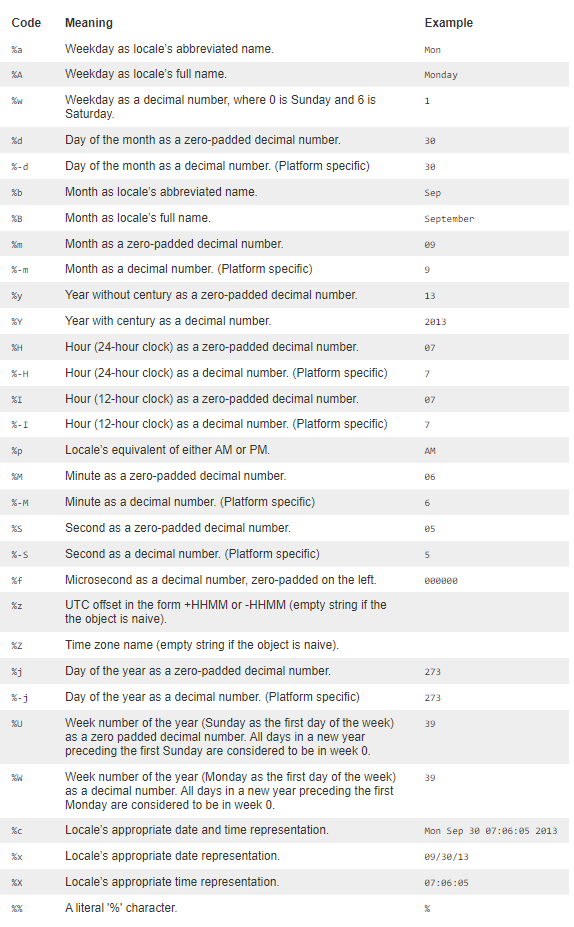

**Handling Time Zones**

In [5]:
# Create three dates
dates = pd.Series(pd.date_range('2/2/2002', periods=3, freq='M'))

In [6]:
dates.dt.tz_localize('Africa/Abidjan')

0   2002-02-28 00:00:00+00:00
1   2002-03-31 00:00:00+00:00
2   2002-04-30 00:00:00+00:00
dtype: datetime64[ns, Africa/Abidjan]

**Selecting Dates and Times**

In [7]:
# Load library
import pandas as pd

In [8]:
# Create data frame
dataframe = pd.DataFrame()

In [9]:
# Create datetimes
dataframe['date'] = pd.date_range('1/1/2001', periods=100000, freq='H')

dataframe

In [17]:
# Select observations between two datetimes
dataframe[(dataframe['date'] > '2002-1-1 01:00:00') &
(dataframe['date'] <= '2002-1-1 04:00:00')]

date
date                                   
2002-01-01 02:00:00 2002-01-01 02:00:00
2002-01-01 03:00:00 2002-01-01 03:00:00
2002-01-01 04:00:00 2002-01-01 04:00:00

In [18]:
# Set index
dataframe = dataframe.set_index(dataframe['date'])

In [19]:
dataframe.loc['2002-1-1 01:00:00':'2002-1-1 04:00:00']

date
date                                   
2002-01-01 01:00:00 2002-01-01 01:00:00
2002-01-01 02:00:00 2002-01-01 02:00:00
2002-01-01 03:00:00 2002-01-01 03:00:00
2002-01-01 04:00:00 2002-01-01 04:00:00

**Breaking Up Date Data into Multiple Features**

In [21]:
# Load library
import pandas as pd
# Create data frame
dataframe = pd.DataFrame()
# Create five dates
dataframe['date'] = pd.date_range('1/1/2001', periods=150, freq='W')
# Create features for year, month, day, hour, and minute
dataframe['year'] = dataframe['date'].dt.year
dataframe['month'] = dataframe['date'].dt.month
dataframe['day'] = dataframe['date'].dt.day
dataframe['hour'] = dataframe['date'].dt.hour
dataframe['minute'] = dataframe['date'].dt.minute

In [22]:
dataframe

date  year  month  day  hour  minute
0   2001-01-07  2001      1    7     0       0
1   2001-01-14  2001      1   14     0       0
2   2001-01-21  2001      1   21     0       0
3   2001-01-28  2001      1   28     0       0
4   2001-02-04  2001      2    4     0       0
..         ...   ...    ...  ...   ...     ...
145 2003-10-19  2003     10   19     0       0
146 2003-10-26  2003     10   26     0       0
147 2003-11-02  2003     11    2     0       0
148 2003-11-09  2003     11    9     0       0
149 2003-11-16  2003     11   16     0       0

[150 rows x 6 columns]

**Calculating the Difference Between Dates**

In [23]:
# Load library
import pandas as pd
# Create data frame
dataframe = pd.DataFrame()

In [24]:
# Create two datetime features
dataframe['Arrived'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-04-2017')]
dataframe['Left'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-06-2017')]

In [26]:
dataframe['Left'] - dataframe['Arrived']

0   0 days
1   2 days
dtype: timedelta64[ns]

In [27]:
pd.Series(delta.days for delta in (dataframe['Left'] - dataframe['Arrived']))

0    0
1    2
dtype: int64

**Encoding Days of the Week**

In [28]:
# Load library
import pandas as pd
# Create dates
dates = pd.Series(pd.date_range("2/2/2002", periods=3, freq="M"))

In [29]:
dates

0   2002-02-28
1   2002-03-31
2   2002-04-30
dtype: datetime64[ns]

In [31]:
dates.dt.weekday

0    3
1    6
2    1
dtype: int64

**Creating a Lagged Feature**

In [32]:
import pandas as pd
# Create data frame
dataframe = pd.DataFrame()
# Create data
dataframe["dates"] = pd.date_range("1/1/2001", periods=5, freq="D")
dataframe["stock_price"] = [1.1,2.2,3.3,4.4,5.5]

In [33]:
dataframe

dates  stock_price
0 2001-01-01          1.1
1 2001-01-02          2.2
2 2001-01-03          3.3
3 2001-01-04          4.4
4 2001-01-05          5.5

In [34]:
# Lagged values by one row
dataframe["previous_days_stock_price"] = dataframe["stock_price"].shift(1)

In [37]:
dataframe['Change'] = dataframe['stock_price']/dataframe['previous_days_stock_price']

In [38]:
dataframe

dates  stock_price  previous_days_stock_price    Change
0 2001-01-01          1.1                        NaN       NaN
1 2001-01-02          2.2                        1.1  2.000000
2 2001-01-03          3.3                        2.2  1.500000
3 2001-01-04          4.4                        3.3  1.333333
4 2001-01-05          5.5                        4.4  1.250000

**Using Rolling Time Windows**

In [39]:
# Load library
import pandas as pd
# Create datetimes
time_index = pd.date_range("01/01/2010", periods=5, freq="M")
# Create data frame, set index
dataframe = pd.DataFrame(index=time_index)

In [41]:
dataframe

Empty DataFrame
Columns: []
Index: [2010-01-31 00:00:00, 2010-02-28 00:00:00, 2010-03-31 00:00:00, 2010-04-30 00:00:00, 2010-05-31 00:00:00]

In [42]:
# Create feature
dataframe["Stock_Price"] = [1,2,3,4,5]

In [43]:
dataframe

Stock_Price
2010-01-31            1
2010-02-28            2
2010-03-31            3
2010-04-30            4
2010-05-31            5

In [44]:
dataframe.rolling(window=2).mean()

Stock_Price
2010-01-31          NaN
2010-02-28          1.5
2010-03-31          2.5
2010-04-30          3.5
2010-05-31          4.5

For example, if we have a time window of three months and we want a rolling mean,
we would calculate:

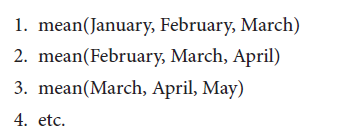

**Handling Missing Data in Time Series**

In [45]:
# Load libraries
import pandas as pd
import numpy as np

In [46]:
# Create date
time_index = pd.date_range("01/01/2010", periods=5, freq="M")

In [47]:
dataframe = pd.DataFrame(index=time_index)

In [48]:
# Create feature with a gap of missing values
dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0]

In [50]:
dataframe.interpolate()

Sales
2010-01-31    1.0
2010-02-28    2.0
2010-03-31    3.0
2010-04-30    4.0
2010-05-31    5.0

In [51]:
dataframe.ffill()

Sales
2010-01-31    1.0
2010-02-28    2.0
2010-03-31    2.0
2010-04-30    2.0
2010-05-31    5.0

In [52]:
dataframe.bfill()

Sales
2010-01-31    1.0
2010-02-28    2.0
2010-03-31    5.0
2010-04-30    5.0
2010-05-31    5.0

In [53]:
# Interpolate missing values
dataframe.interpolate(method="quadratic")

Sales
2010-01-31  1.000000
2010-02-28  2.000000
2010-03-31  3.059808
2010-04-30  4.038069
2010-05-31  5.000000